<a href="https://colab.research.google.com/github/Chonthichasi/DWDM2021/blob/main/Chapter_8_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **K-means**

## **Generate Data**

In [ ]:
from sklearn.datasets import make_blobs

In [ ]:
X, y = make_blobs(n_samples=500, centers=3, n_features=2, random_state=6)
# Centers คือ แบ่งข้อมูลออกเป็นกี่กลุ่ม , n_features คือ ให้มี x กี่กลุ่ม

## **Explore Data**

In [ ]:
X.shape

(500, 2)

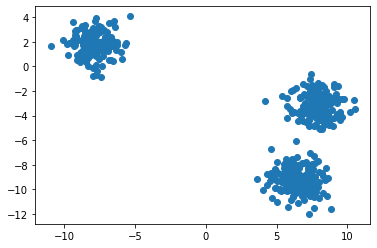

In [ ]:
from matplotlib import pyplot as plt 
plt.scatter(X[:,0],X[:,1])

## **Clustering**

### **Import**

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

### **Define**

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=6)

### **Fit-Predict**

In [ ]:
y_clust = kmeans.fit_predict(X)

In [ ]:
y_clust

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,

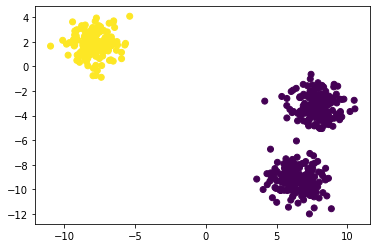

In [ ]:
plt.scatter(X[:,0],X[:,1],c=y_clust)

### **3 Cluster**

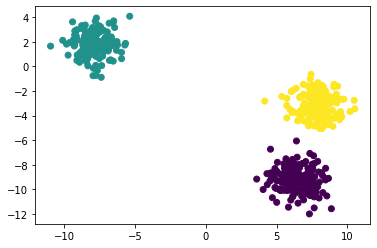

In [ ]:
# Define
kmeans = KMeans(n_clusters=3, random_state=6)
# Fit-Predict
y_clust = kmeans.fit_predict(X)
# Plot
plt.scatter(X[:,0],X[:,1],c=y_clust)

### **4 Cluster**

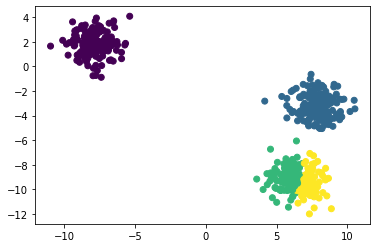

In [ ]:
# Define
kmeans = KMeans(n_clusters=4, random_state=0, init= 'random')
# Fit-Predict
y_clust = kmeans.fit_predict(X)
# Plot
plt.scatter(X[:,0],X[:,1],c=y_clust)

### **5 Cluster**

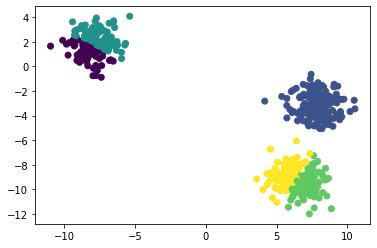

In [ ]:
# Define
kmeans = KMeans(n_clusters=5, random_state=14, init= 'random')
# Fit-Predict
y_clust = kmeans.fit_predict(X)
# Plot
plt.scatter(X[:,0],X[:,1],c=y_clust)

## **Example Application (Color Quantization)**

In [ ]:
import cv2
import os

In [ ]:
img = cv2.imread('/content/images.jpg')

In [ ]:
img.shape

(679, 452, 3)

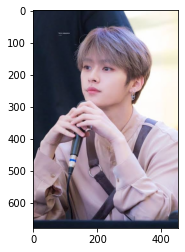

In [ ]:
RGB_img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)

### นับจำนวนสี

In [ ]:
import numpy as np

In [ ]:
np.unique(np.reshape(RGB_img,(RGB_img.shape[0]*RGB_img.shape[1],3)),axis=0).shape

(58364, 3)

### จัดกลุ่มสีให้เหลือ 16 สี

In [ ]:
myquantize = KMeans(n_clusters=16,random_state=6)


### แปลงข้อมูลให้อยู่ในรูป row-column

In [ ]:
img_row = np.reshape(RGB_img,(RGB_img.shape[0]*RGB_img.shape[1],3))
img_row.shape

(306908, 3)

In [ ]:
final_color = myquantize.fit_predict(img_row)

### ใช้ centroid เป็นตัวแทนของสี

In [ ]:
centroid = myquantize.cluster_centers_

In [ ]:
centroid

array([[180.52552039, 160.80826918, 183.24049045],
       [ 43.10486367,  43.54347826,  61.13264554],
       [253.37313433, 250.93810266, 245.95719696],
       [128.99185788, 103.76085055, 113.55844156],
       [215.00945813, 195.38537931, 209.47668966],
       [ 24.05957363,  30.22353332,  44.6940789 ],
       [ 79.38846677,  60.13260817,  66.40022395],
       [160.90468394, 126.28480923, 132.77441629],
       [104.46229533,  82.60357518,  90.74763407],
       [200.8153753 , 155.60541335, 155.72224144],
       [244.60646109, 241.19422418, 223.20998532],
       [ 67.1490481 ,  79.66708417, 116.4509018 ],
       [203.50301461, 178.90765994, 192.7782139 ],
       [224.99368741, 213.73752907, 227.5921496 ],
       [125.45068731, 116.85092753, 150.30415054],
       [166.21106794, 142.48692639, 161.99264938]])

In [ ]:
new_img = np.zeros(RGB_img.shape)
for i in range(RGB_img.shape[0]):
     for j in range(RGB_img.shape[1]):
          new_img[i,j,:] = centroid[myquantize.predict([RGB_img[i,j,:]]),:]

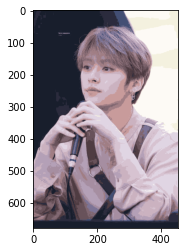

In [ ]:
plt.imshow(new_img/255)

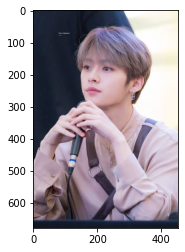

In [ ]:
plt.imshow(RGB_img/255)

In [ ]:
plt.imsave('img.jpg',new_img/255)